In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [199]:
df = pd.concat([pd.read_csv("./genel-binis-raporu_2015-2022.csv", sep=";"),pd.read_csv("./genel-binis-raporu.csv", sep=";")])
df.set_index("DATE", inplace=True)

In [200]:
df

,INSTITUTION,FULL_FARE,STUDENT,TEACHER,SIXTY_YEARS_OLD,TICKET,CHILD,PERSONNEL,FREE
DATE,,,,,,,,,
2015-06-01,Eshot,1447,925,35,0,0,0,0,237
2015-06-01,Izdeniz,0,3,0,0,0,0,0,2
2015-06-01,Izdeniz-Araba,0,0,0,0,0,0,0,0
2015-06-01,Izulas,928,961,19,0,0,0,0,185
2015-06-01,İzban,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2023-03-31,Metro,130207,93272,2542,6512,374,21,5795,38659
2023-03-31,NOSTALJİK TRAMVAY,28,8,0,3,0,0,0,0
2023-03-31,Seferihisar Mot. Taş. Kooperat,4725,3278,127,244,1,0,280,3356


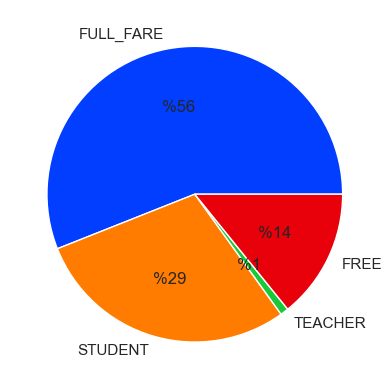

In [201]:
x = df[["FULL_FARE","STUDENT","TEACHER","FREE"]].sum()
plt.pie(x, labels=x.index,autopct='%%%.0f', colors=sns.color_palette('bright'));

In [202]:
df[df.select_dtypes(include='number').lt(0).any(axis=1)]

,INSTITUTION,FULL_FARE,STUDENT,TEACHER,SIXTY_YEARS_OLD,TICKET,CHILD,PERSONNEL,FREE
DATE,,,,,,,,,
2017-01-13,Teleferik,8,0,1,-5,0,0,0,0
2019-12-05,Teleferik,1,-1,0,0,0,0,0,0
2021-09-22,Teleferik,-2,0,0,0,0,0,0,0


In [203]:
df.loc["2017-01-13","SIXTY_YEARS_OLD"] = 0
df.loc["2019-12-05","STUDENT"] = 0
df.loc["2021-09-22","FULL_FARE"] = 0

In [204]:
groups = df.groupby("INSTITUTION").sum().sum(axis=1)

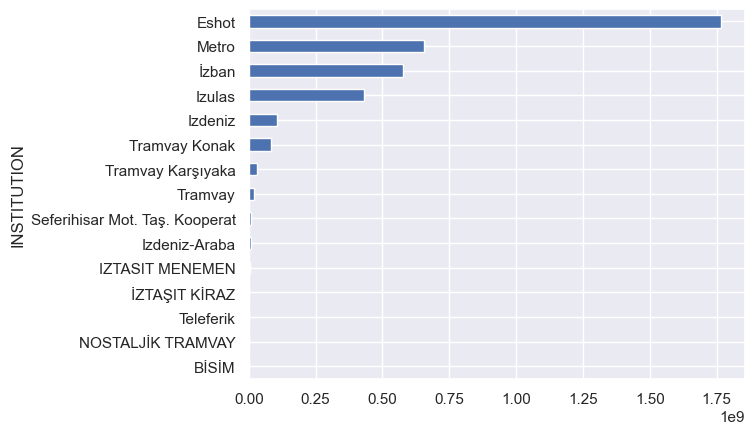

In [205]:
groups.sort_values().plot.barh();